Tutorial: Comparing cycles of a cyclic voltammogram
====================================

*Internet connection required*: This tutorial reads data from a github repository [here](https://github.com/ixdat/tutorials/tree/43e85d07254e67e950f9c7081ffe1fa7f053cc08/L3_data_structure/exports).

Here we will show how to use `ixdat` and python to analyze two cases where the difference in integrated current between two cycles in cyclic voltammatry is needed. 

Using the CO stripping example, we will show three ways of visualizing the stripping experiment and determining the surface area of a platinum electrode. Each gives the amount of charge associated with oxidation of adsorbed CO, and thus an estimate of the electrochemical surface area of the electrode. From most generalized to most automated, they are:

- Finding the right timespans, getting the data as numpy vectors with `grab()`, and integrating with `trapz()`
- Selecting the data with `CyclicVoltammagram` indexing and `select_sweep()`, and integrating with `integrate()`
- Using `subtract()` to get a `CyclicVoltammagramDiff` object that does the analysis.

Then, you will, on your own, choose whichever method you like to calculate the amount of charge associated with the reduction of an oxide layer, which gives an estimate of the thickness of the oxide layer.

Setup
--------
We'll use `numpy` and `pathlib.Path` as well as `ixdat`'s `CyclicVoltammagram` measurement type.

In [1]:
import numpy as np
from pathlib import Path

from ixdat.techniques import CyclicVoltammogram

importing ixdat v0.2.7.dev1 from C:\Users\Søren\git\ixdat\src\ixdat\__init__.py


Loading raw data
----------------------

In [2]:
# Below is An option to load from file. Today we will load from url
# co_strip = CyclicVoltammagram.read(d"../loading_appending_and_saving/co_strip.csv", reader="ixdat")
if True:  # Set this to False for offline work (requires you have downloaded the data file.)
    co_strip = CyclicVoltammogram.read_url(
        "https://raw.githubusercontent.com/ixdat/tutorials/43e85d07254e67e950f9c7081ffe1fa7f053cc08/L3_data_structure/exports/co_strip.csv",
        reader="ixdat"
    )
else:
    co_strip = CyclicVoltammogram.read(
        "./data/co_strip.csv",
        reader="ixdat"
    )

skipping the following line:
ixdat version = 0.2.0dev

skipping the following line:
backend_name = BackendBase(none, address=none)



<Axes: xlabel='$U_{RHE}$ / [V]', ylabel='<I>/mA'>

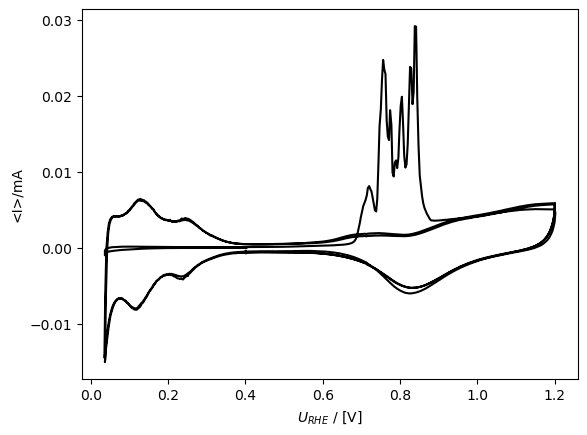

In [3]:
co_strip.plot()

Selecting and calibrating
----------------------------------

In [4]:
co_strip.calibrate(
    # RE_vs_RHE=0.715,  # NOTE, the potential was already calibrated, 
                        # and recalibrating after exporting and reading
                        # causes problems in ixdat v0.2.0 :(
    A_el=0.196, 
    R_Ohm=100
)
help(co_strip.calibrate)

Help on method calibrate in module ixdat.measurements:

calibrate(*args, **kwargs) method of ixdat.techniques.cv.CyclicVoltammogram instance
    Add a calibration of the Measurement's default calibration type
    
    The calibration class is determined by the measurement's `technique`.
    *args and **kwargs are passed to the calibration class's `__init__`.
    
    Raises:
        TechniqueError if no calibration class for the measurement's technique



In [5]:
co_strip.grab(co_strip.U_name)

(array([  0.        ,   1.        ,   2.        , ..., 499.49669385,
        499.65079403, 499.80489397]),
 array([0.40165539, 0.40083473, 0.39980446, ..., 0.38106973, 0.37801271,
        0.37514458]))

<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

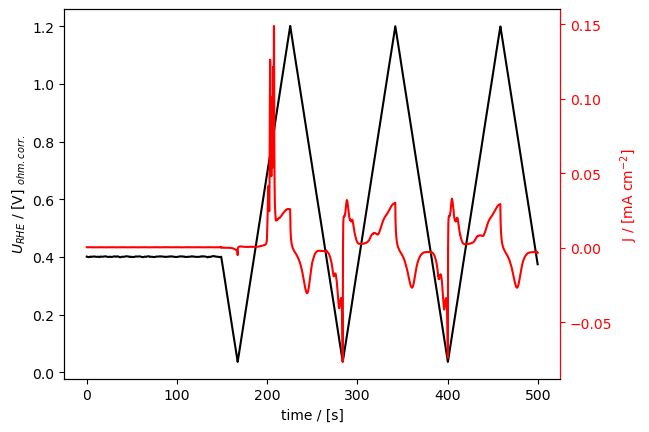

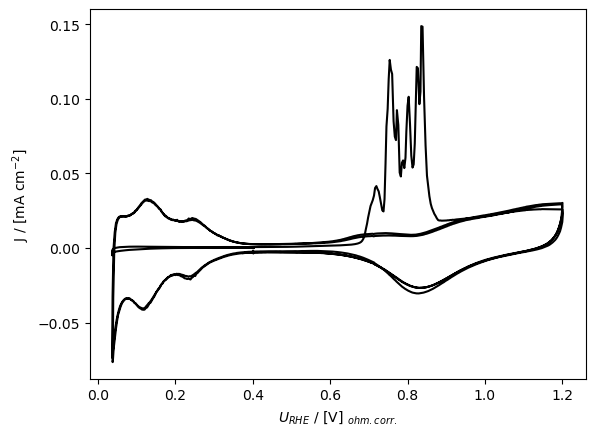

In [6]:
co_strip.plot_measurement()
co_strip.plot()

Method 1: `grab()` and `np.trapz`
-----------------------------------------

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V] $_{ohm. corr.}$'>,
 <Axes: ylabel='J / [mA cm$^{-2}$]'>]

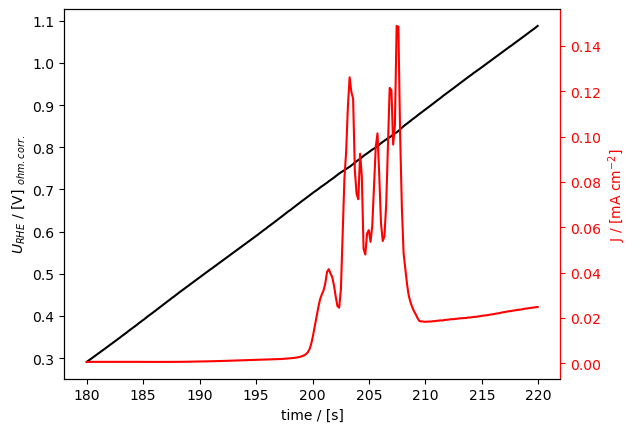

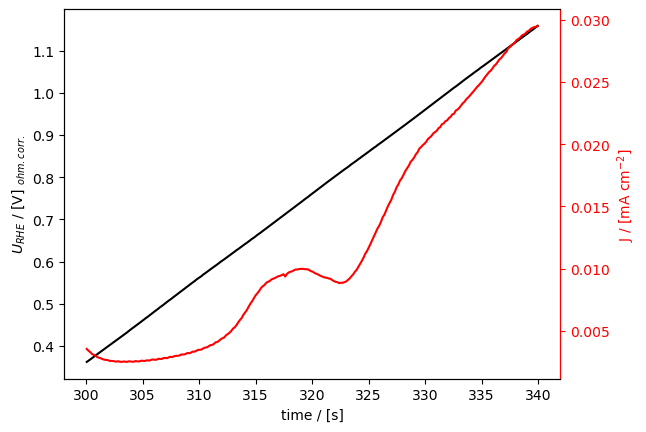

In [7]:
co_strip.plot_measurement(tspan=[180, 220])
co_strip.plot_measurement(tspan=[300, 340])

In [8]:
tspan_strip = [195, 215]
t_strip, I_strip = co_strip.grab("raw_current", tspan=tspan_strip)


tspan_base = [310, 330]
t_base, I_base = co_strip.grab("raw_current", tspan=tspan_base)

In [9]:
print("got these vectors for the strip:")
print(f"t/[s] = {t_strip} \nand \nI/[mA] = {I_strip}")
print()
print(f"they have these shapes: {t_strip.shape} and {I_strip.shape}")
print()
print(f"And for the base, the vectors have shapes: {t_base.shape} and {I_base.shape}")

got these vectors for the strip:
t/[s] = [195.11739755 195.27149773 195.42559767 195.57969761 195.73379755
 195.88789773 196.04199767 196.19609761 196.35019755 196.50429749
 196.65839767 196.81249762 196.96659756 197.1206975  197.27479768
 197.42889762 197.58299756 197.7370975  197.89119768 198.04529762
 198.19939756 198.35349751 198.50759768 198.66169763 198.81579757
 198.96989751 199.12399769 199.27809763 199.43219757 199.58629751
 199.74039745 199.89449763 200.04859757 200.20269752 200.35679746
 200.51089764 200.66499758 200.81909752 200.97319746 201.12729764
 201.28139758 201.43549752 201.58959746 201.74369764 201.89779758
 202.05189753 202.20599747 202.36009765 202.51419759 202.66829753
 202.82239747 202.97649741 203.13059759 203.28469753 203.43879747
 203.59289742 203.74699759 203.90109754 204.05529761 204.20929742
 204.3634975  204.51749754 204.67169762 204.82569742 204.9798975
 205.13389754 205.28809738 205.44209743 205.5962975  205.75029755
 205.90449739 206.05849743 206.21269

**Checking what we've got**


Text(0.5, 1.0, 'stripping current')

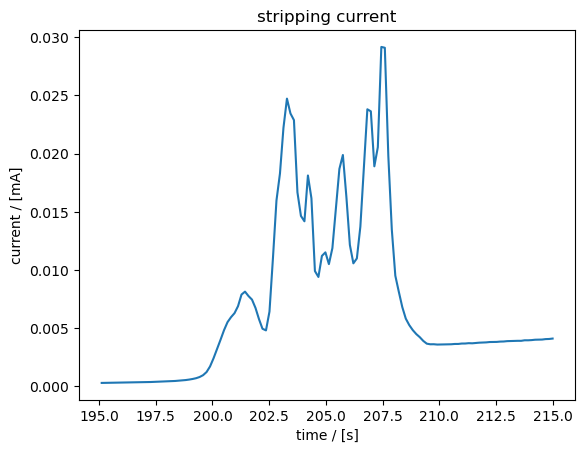

In [10]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(t_strip, I_strip)
ax1.set_xlabel("time / [s]")
ax1.set_ylabel("current / [mA]")
ax1.set_title("stripping current")

Text(0.5, 1.0, 'strip and base current vs time')

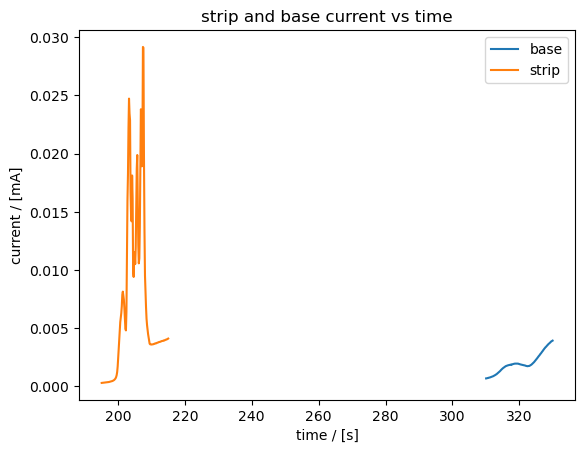

In [11]:
fig, ax2 = plt.subplots()
ax2.plot(t_base, I_base, label="base")
ax2.plot(t_strip, I_strip, label="strip")
ax2.legend()
ax2.set_xlabel("time / [s]")
ax2.set_ylabel("current / [mA]")
ax2.set_title("strip and base current vs time")

Text(0, 0.5, 'current / [mA]')

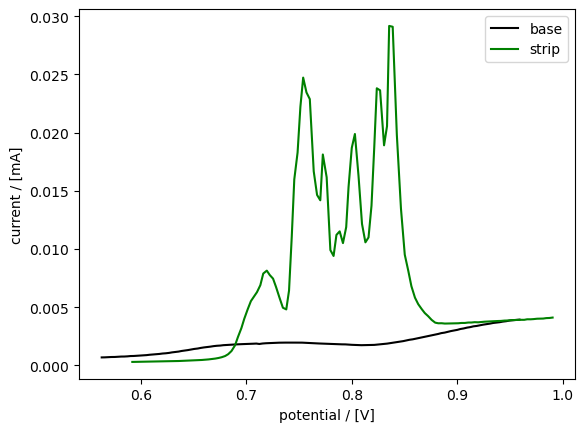

In [12]:
v_strip = co_strip.grab_for_t("potential", t_strip)
v_base = co_strip.grab_for_t("potential", t_base)

fig, ax = plt.subplots()
ax.plot(v_base, I_base, color="k", label="base")
ax.plot(v_strip, I_strip, color="g", label="strip")
ax.legend()
ax.set_xlabel("potential / [V]")
ax.set_ylabel("current / [mA]")

Text(0, 0.5, 'current / [mA]')

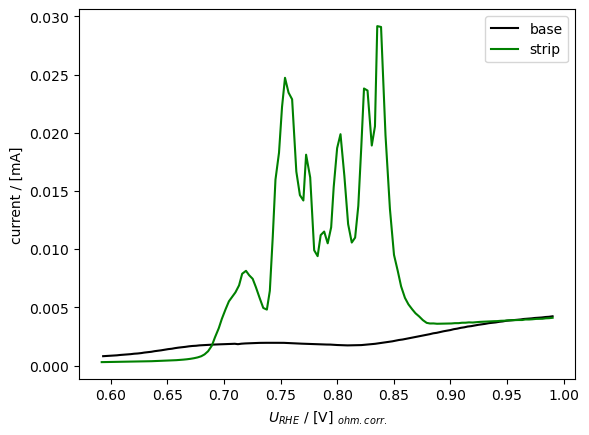

In [13]:
tspan_base = [311.5, 331.5]
t_base, I_base = co_strip.grab("raw_current", tspan=tspan_base)
v_base = co_strip.grab_for_t("potential", t_base)


fig, ax = plt.subplots()
ax.plot(v_base, I_base, color="k", label="base")
ax.plot(v_strip, I_strip, color="g", label="strip")
ax.legend()
ax.set_xlabel(co_strip.U_name)
ax.set_ylabel("current / [mA]")

**And do the integration!**

In [14]:
Q_strip = np.trapz(I_strip, t_strip) * 1e-3  # converts mC --> C

Q_base = np.trapz(I_base, t_base) * 1e-3

Q_CO_ox = Q_strip - Q_base

from ixdat.constants import FARADAY_CONSTANT


#  CO + H2O --> CO2  + 2(H+ + e-)
n_CO_ox = Q_CO_ox / (FARADAY_CONSTANT * 2)

print(f"charge passed = {Q_CO_ox*1e6} uC, corresponding to {n_CO_ox*1e9} nmol of CO oxidized")


charge passed = 94.95604644970163 uC, corresponding to 0.49207503544863207 nmol of CO oxidized


Method 2: Sweep selection and `integrate()`
----------------------------------------------------------

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V] $_{ohm. corr.}$'>,
 <Axes: ylabel='cycle'>]

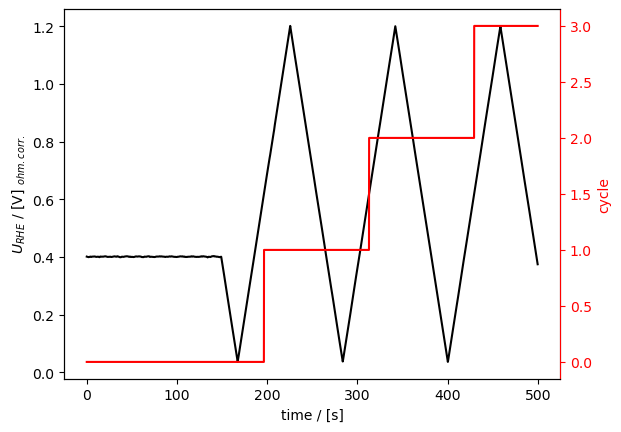

In [15]:
co_strip.plot_measurement(
    J_name="cycle"
)

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V] $_{ohm. corr.}$'>,
 <Axes: ylabel='cycle'>]

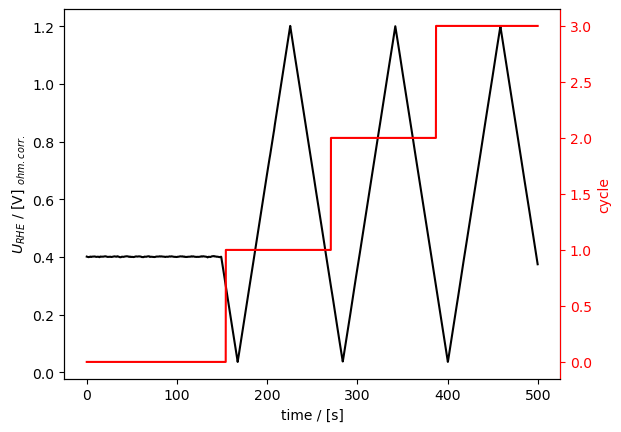

In [16]:
co_strip.redefine_cycle(start_potential=0.3, redox=False)
co_strip.plot_measurement(J_name="cycle")

<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

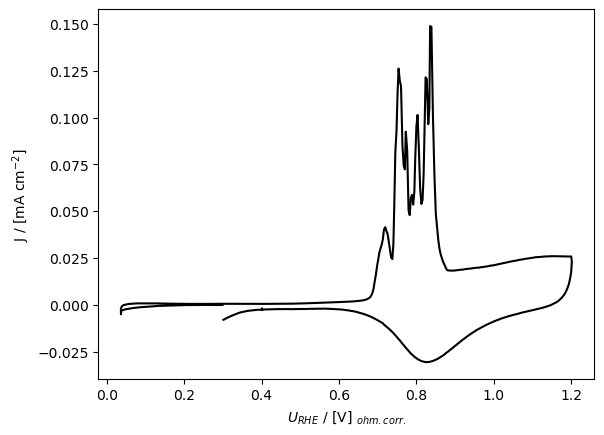

In [17]:
co_strip[1].plot()

The code below selects two cycles from the CO stripping experiment. 

The code in the next bloc calculates the amount of CO according to:

$n_{CO} = \frac{1}{2 \mathcal{F}} \int_{0.6 V_{RHE}}^{1.0 V_{RHE}} ( I_{strip} - I_{base} ) \mathrm{d}t $

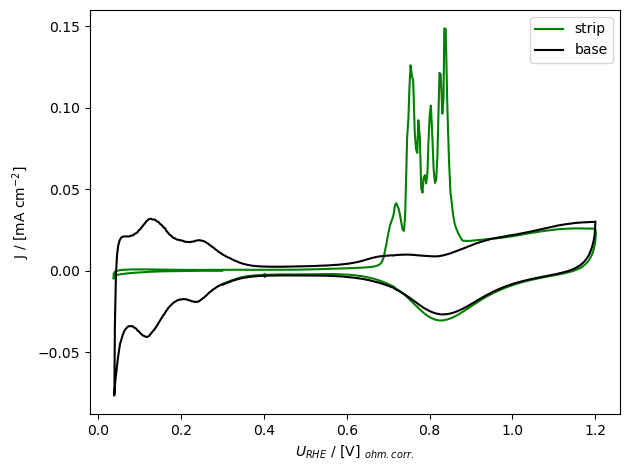

In [18]:
stripping_cycle = co_strip[1]
base_cycle = co_strip[2]

ax = stripping_cycle.plot(color="green", label="strip")
base_cycle.plot(ax=ax, color="black", label="base")

ax.legend()

ax.get_figure().tight_layout()

ax.get_figure().savefig("02_two_cycles.png")

In [19]:
vspan = [0.6, 1.0]

stripping_sweep = stripping_cycle.select_sweep(vspan=vspan)
base_sweep = base_cycle.select_sweep(vspan=vspan)

stripping_sweep  # to show what you get from this

CyclicVoltammogram(id=5, name='extended_platinum_ec')

<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

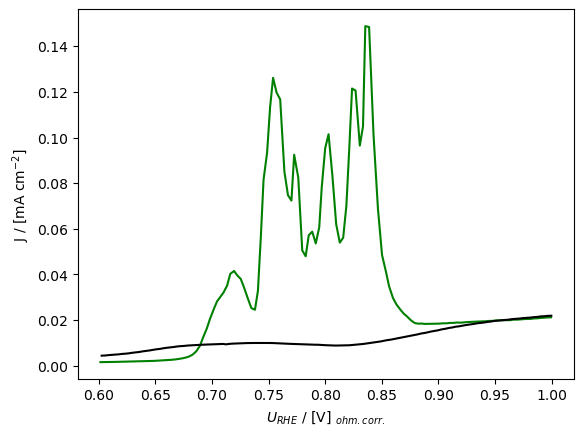

In [20]:
ax = stripping_sweep.plot(color="g")
base_sweep.plot(color="k", ax=ax)

charge passed = 95.14178417627072 uC, corresponding to 0.49303755339038363 nmol of CO oxidized


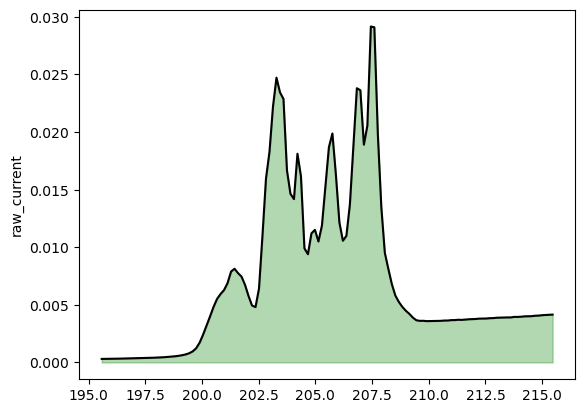

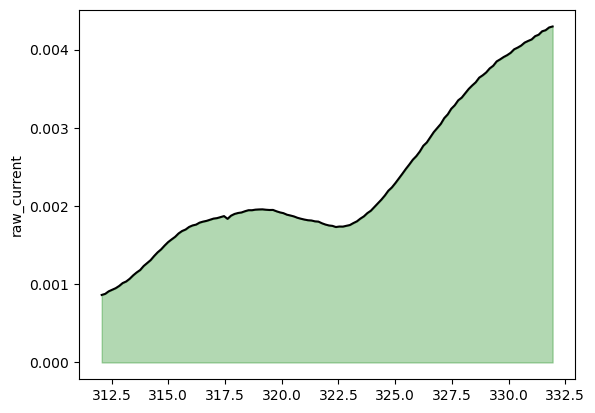

In [21]:
Q_strip = stripping_sweep.integrate("raw_current", ax="new") * 1e-3
Q_base = base_sweep.integrate("raw_current", ax="new") * 1e-3

Q_CO_ox = Q_strip - Q_base
n_CO_ox = Q_CO_ox / (FARADAY_CONSTANT * 2)

print(f"charge passed = {Q_CO_ox*1e6} uC, corresponding to {n_CO_ox*1e9} nmol of CO oxidized")

Method 3: `CyclicVoltammagramDiff`
------------------------------------------------

<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

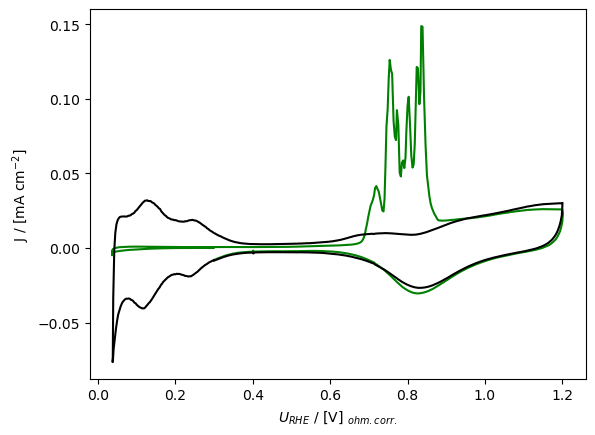

In [22]:
stripping_cycle = co_strip[1]
base_cycle = co_strip[2]

ax = stripping_cycle.plot(color="g")
base_cycle.plot(ax=ax, color="k")

C:\Users\Søren\git\ixdat\src\ixdat\techniques\analysis_tools.py:92: RuntimeWarning: invalid value encountered in divide
  v_scan_behind = (v - v_behind) / (t - t_behind)
C:\Users\Søren\git\ixdat\src\ixdat\techniques\analysis_tools.py:93: RuntimeWarning: invalid value encountered in divide
  v_scan_ahead = (v_ahead - v) / (t_ahead - t)


<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

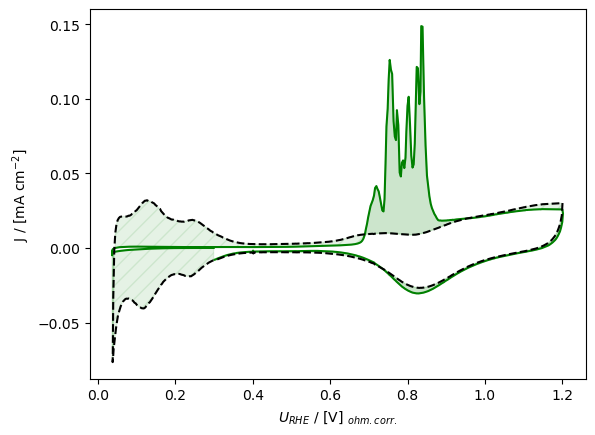

In [23]:
cv_diff = stripping_cycle.diff_with(base_cycle)

cv_diff.plot()

<Axes: >

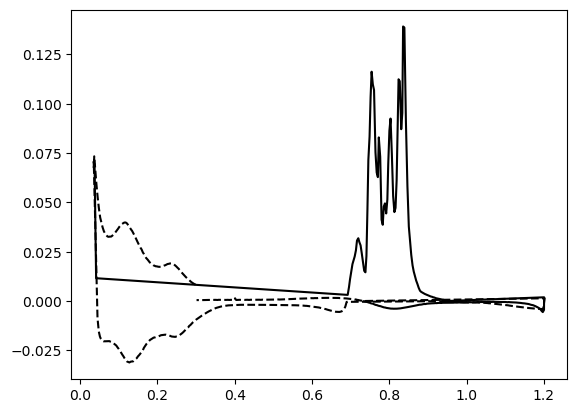

In [24]:
cv_diff.plot_diff()

[<Axes: xlabel='time / [s]', ylabel='$U_{RHE}$ / [V] $_{ohm. corr.}$'>,
 <Axes: ylabel='J / [mA cm$^{-2}$]'>]

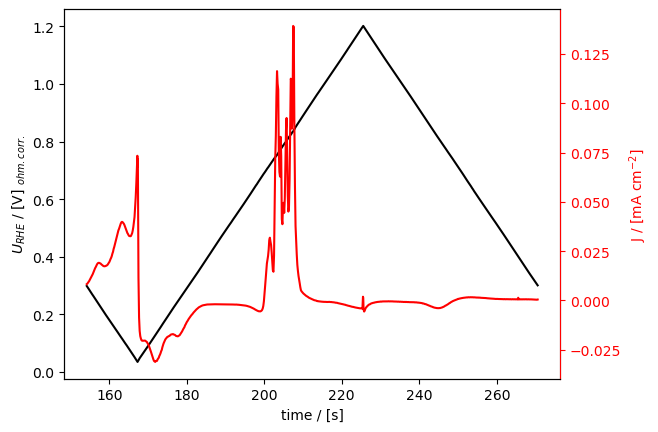

In [25]:
cv_diff.plot_measurement()

In [26]:
Q_CO_ox = cv_diff.integrate("raw_current", vspan=[0.6, 1.0]) * 1e-3  # 1e-3 converts mC --> C
n_CO_ox = Q_CO_ox / (FARADAY_CONSTANT * 2)

print(f"charge passed = {Q_CO_ox*1e6} uC, corresponding to {n_CO_ox*1e9} nmol of CO oxidized")

charge passed = 95.08391830687209 uC, corresponding to 0.49273768465321294 nmol of CO oxidized


Your turn!
========

skipping the following line:
ixdat version = 0.2.0dev

skipping the following line:
backend_name = BackendBase(none, address=none)



<Axes: xlabel='$U_{RHE}$ / [V] $_{ohm. corr.}$', ylabel='J / [mA cm$^{-2}$]'>

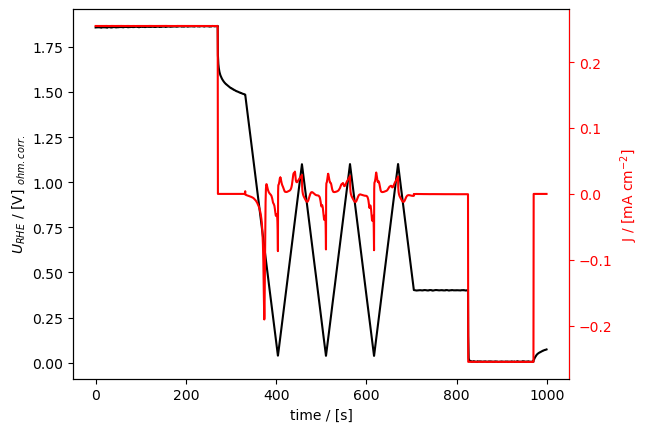

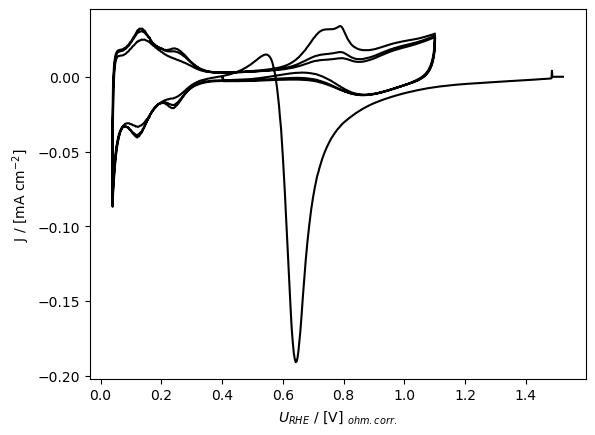

In [27]:
# oxide_reduction = CyclicVoltammagram.read(data_directory / "oxide_reduction.csv", reader="ixdat")
if True:  # Set this to False for offline work (requires you have downloaded the data file.)
    oxide_reduction = CyclicVoltammogram.read_url(
        "https://raw.githubusercontent.com/ixdat/tutorials/43e85d07254e67e950f9c7081ffe1fa7f053cc08/L3_data_structure/exports/oxide_reduction.csv",
        reader="ixdat"
    )
else:
    oxide_reduction = CyclicVoltammogram.read(
        "./data/oxide_reduction.csv", reader="ixdat"
    )
    
oxide_reduction.calibrate(A_el=0.196, R_Ohm=100)

oxide_reduction.tstamp += oxide_reduction.t[0]
oxide_reduction.plot_measurement()
oxide_reduction.plot(tspan=[300, 800])